In [1]:
import numpy as np
import torch
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D

In [2]:
plt.rcParams['figure.figsize'] = [15, 12]

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

X_test = torch.load('../Data/X_test.pt').to(device)
logE_test = torch.load('../Data/logE_test.pt').to(device)
core_test = torch.load('../Data/core_test.pt').to(device)
axis_test = torch.load('../Data/axis_test.pt').to(device)


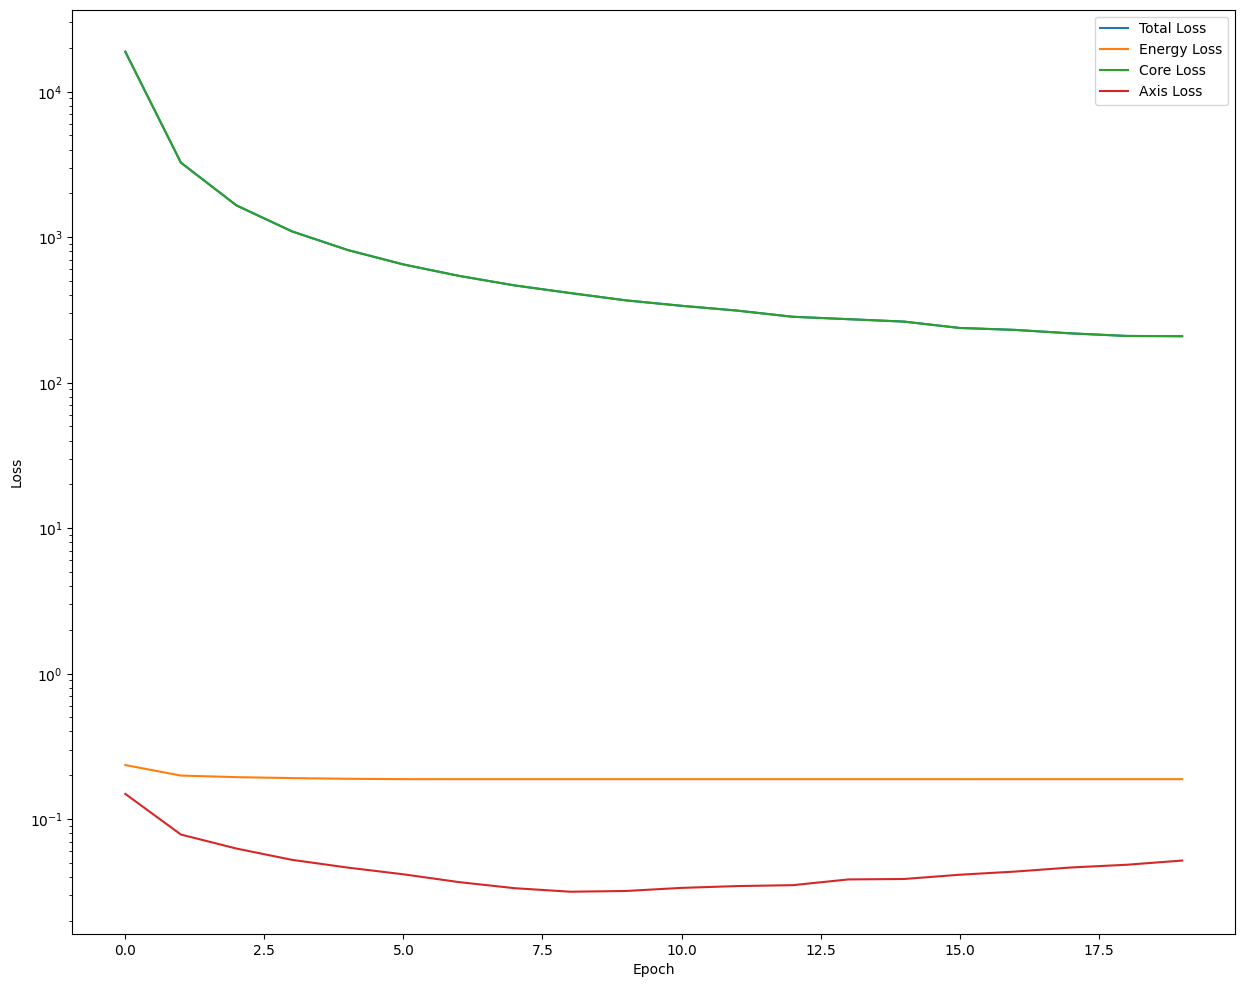

In [4]:
model = torch.load('../Models/Model_1_0.pt')

T_loss = np.asarray(model.T_Loss_hist)
E_loss = np.asarray(model.E_Loss_hist)
C_loss = np.asarray(model.C_Loss_hist)
A_loss = np.asarray(model.A_Loss_hist)

plt.plot(T_loss,label='Total Loss')
plt.plot(E_loss,label='Energy Loss')
plt.plot(C_loss,label='Core Loss')
plt.plot(A_loss,label='Axis Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.show()


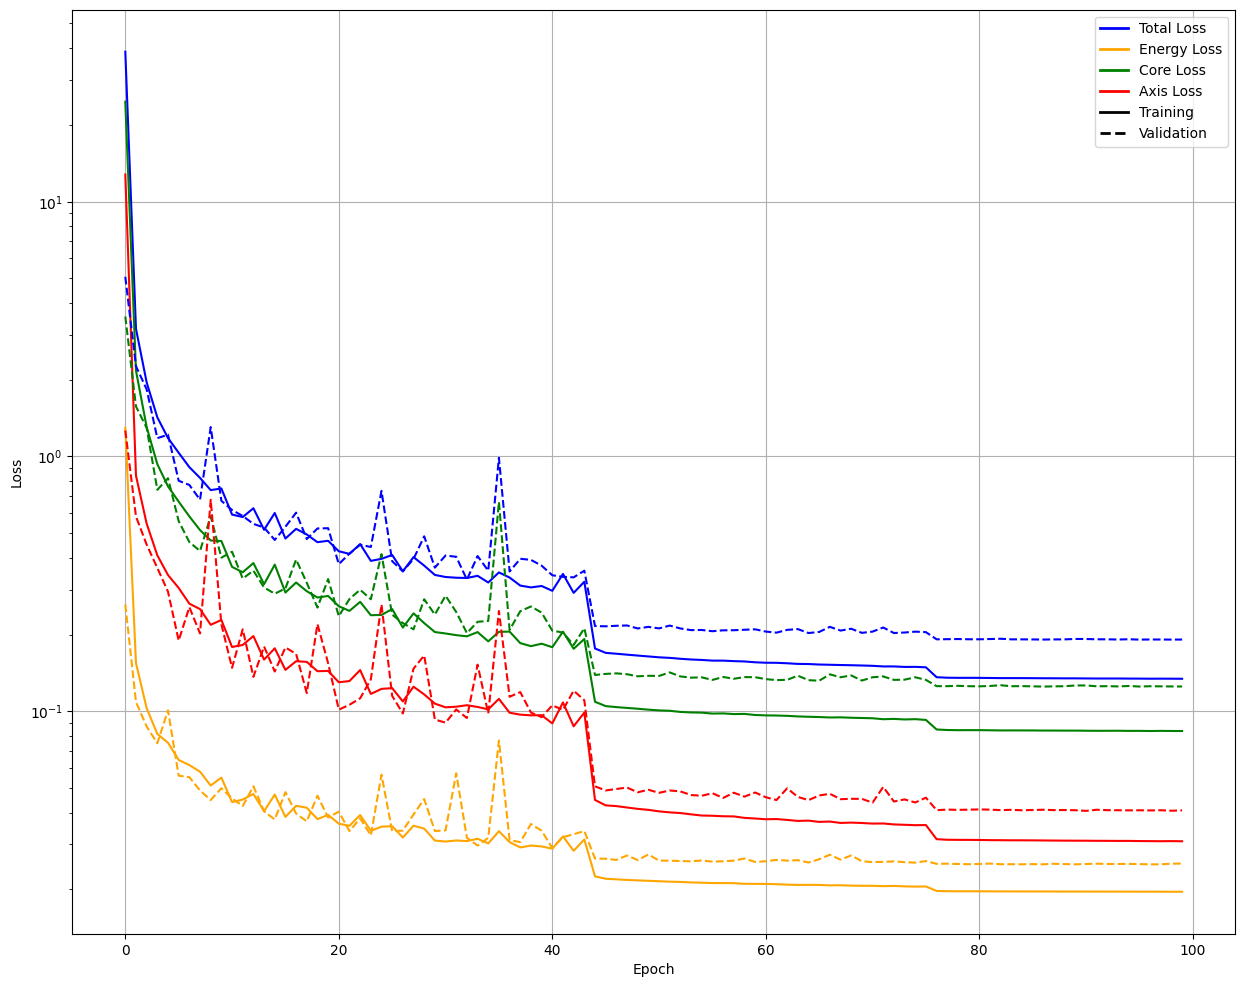

In [45]:
model = torch.load('../Models/Model_2_2.pt')

T_loss = np.asarray(model.T_Loss_hist)[:100]
E_loss = np.asarray(model.E_Loss_hist)[:100]
C_loss = np.asarray(model.C_Loss_hist)[:100]
A_loss = np.asarray(model.A_Loss_hist)[:100]

T_loss_val = np.asarray(model.T_Loss_hist_val)[:100]
E_loss_val = np.asarray(model.E_Loss_hist_val)[:100]
C_loss_val = np.asarray(model.C_Loss_hist_val)[:100]
A_loss_val = np.asarray(model.A_Loss_hist_val)[:100]

# Define colors
colors = ['blue', 'orange', 'green', 'red']

# Plot training loss
plt.plot(T_loss, color=colors[0], label='Total Loss - Training')
plt.plot(E_loss, color=colors[1], label='Energy Loss - Training')
plt.plot(C_loss, color=colors[2], label='Core Loss - Training')
plt.plot(A_loss, color=colors[3], label='Axis Loss - Training')

# Plot validation loss
plt.plot(T_loss_val, color=colors[0], linestyle='dashed', label='Total Loss - Validation')
plt.plot(E_loss_val, color=colors[1], linestyle='dashed', label='Energy Loss - Validation')
plt.plot(C_loss_val, color=colors[2], linestyle='dashed', label='Core Loss - Validation')
plt.plot(A_loss_val, color=colors[3], linestyle='dashed', label='Axis Loss - Validation')

# Set up custom legend

custom_lines = [Line2D([0], [0], color=colors[0], lw=2),
                Line2D([0], [0], color=colors[1], lw=2),
                Line2D([0], [0], color=colors[2], lw=2),
                Line2D([0], [0], color=colors[3], lw=2),
                Line2D([0], [0], color='black', lw=2),
                Line2D([0], [0], color='black', linestyle='dashed', lw=2)]

plt.legend(custom_lines, ['Total Loss', 'Energy Loss', 'Core Loss', 'Axis Loss', 'Training', 'Validation'])

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.grid()
plt.show()


In [34]:
# model = torch.load('../Models/Model_2_1.pt')
# T_loss = np.asarray(model.T_Loss_hist)
# E_loss = np.asarray(model.E_Loss_hist)
# C_loss = np.asarray(model.C_Loss_hist)
# A_loss = np.asarray(model.A_Loss_hist)

# plt.plot(T_loss,label='Total Loss')
# plt.plot(E_loss,label='Energy Loss')
# plt.plot(C_loss,label='Core Loss')
# plt.plot(A_loss,label='Axis Loss')
# plt.legend()
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.yscale('log')
# plt.show()


In [35]:
print(X_test.shape)


Test_Predictions = model(X_test)
# print(Test_Predictions.shape)

torch.Size([20000, 2, 9, 9])


In [36]:
E = 19.25+ Test_Predictions[0].cpu().detach().numpy()
C = 750*Test_Predictions[1].cpu().detach().numpy()
A = Test_Predictions[2].cpu().detach().numpy()

E_test = 19.25+ logE_test.cpu().detach().numpy()
C_test = 750*core_test.cpu().detach().numpy()
A_test = axis_test.cpu().detach().numpy()

Text(0.5, 1.0, 'Energy Prediction')

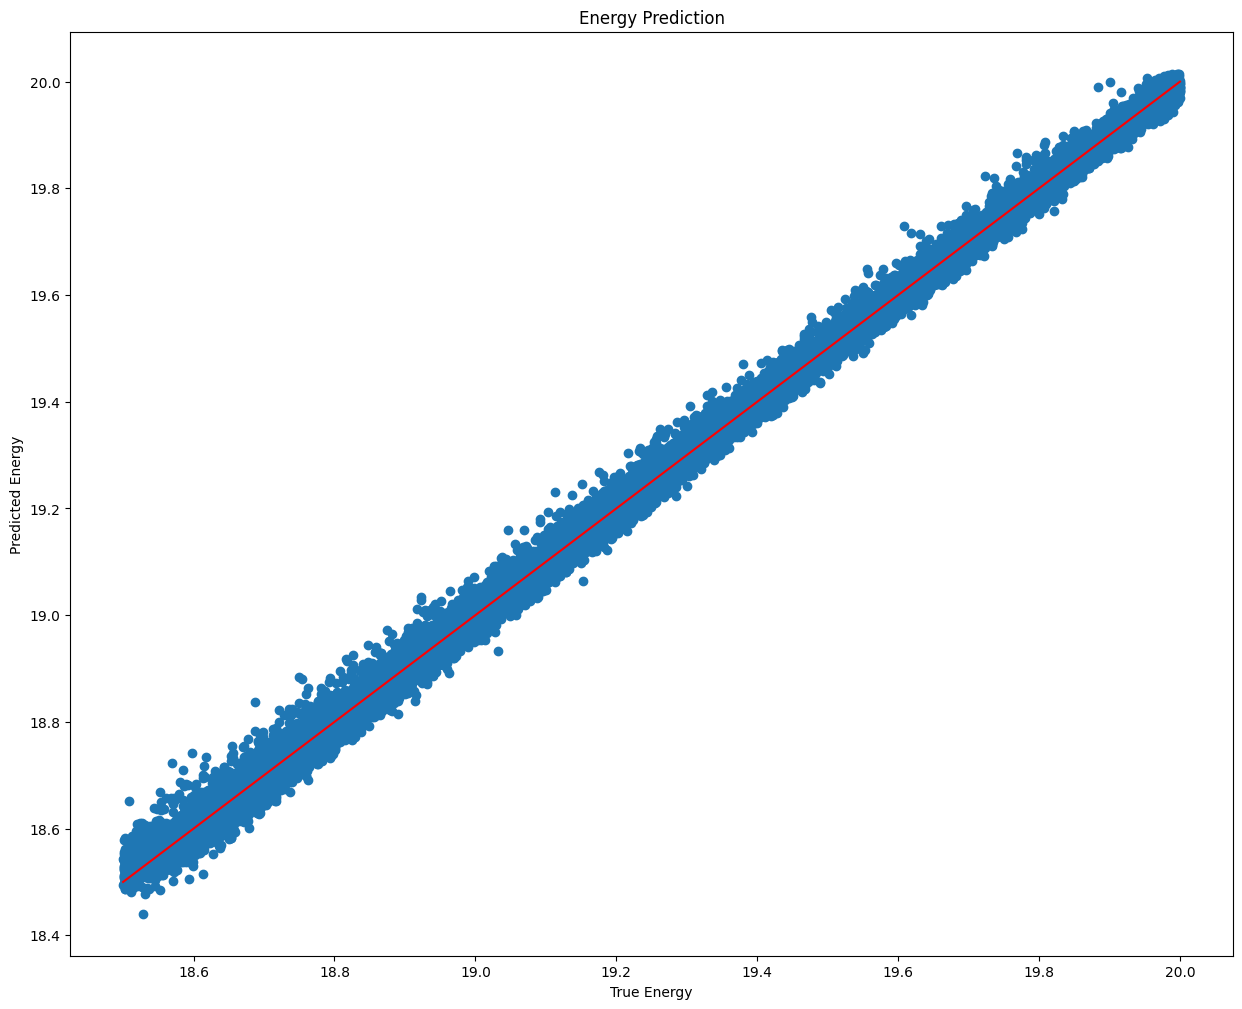

In [37]:
plt.scatter(E_test,E)
plt.plot([18.5,20],[18.5,20],color ='red')
plt.xlabel('True Energy')
plt.ylabel('Predicted Energy')
plt.title('Energy Prediction')

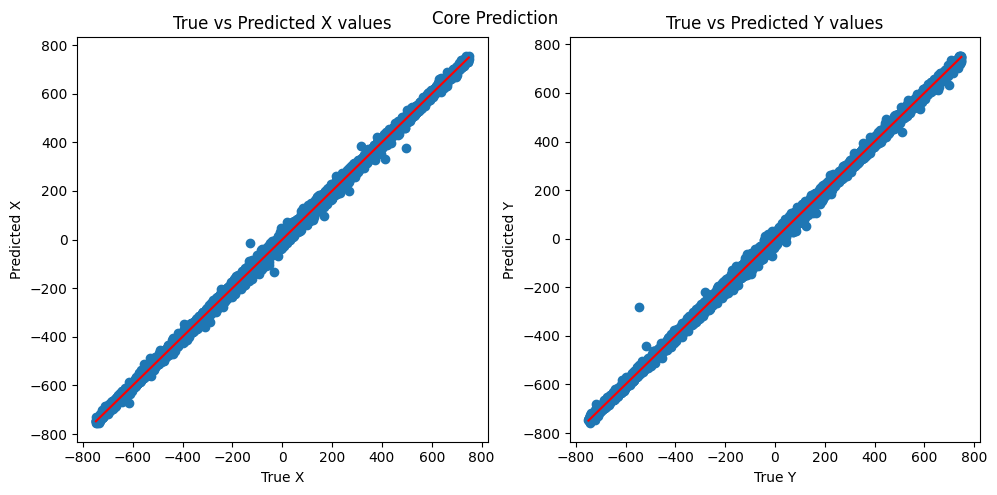

In [38]:
fig, axs = plt.subplots(1,2,figsize=(10,5))
true_x = C_test[:,0]
pred_x = C[:,0]
true_y = C_test[:,1]
pred_y = C[:,1]

# plot for X values
axs[0].scatter(true_x, pred_x)
axs[0].plot([min(true_x), max(true_x)], [min(true_x), max(true_x)], color='red')  # ideal line
axs[0].set_xlabel('True X')
axs[0].set_ylabel('Predicted X')
axs[0].set_title('True vs Predicted X values')

# plot for Y values
axs[1].scatter(true_y, pred_y)
axs[1].plot([min(true_y), max(true_y)], [min(true_y), max(true_y)], color='red')  # ideal line
axs[1].set_xlabel('True Y')
axs[1].set_ylabel('Predicted Y')
axs[1].set_title('True vs Predicted Y values')

# Automatically adjust subplot parameters to give specified padding
plt.tight_layout()
plt.suptitle('Core Prediction')
plt.show()

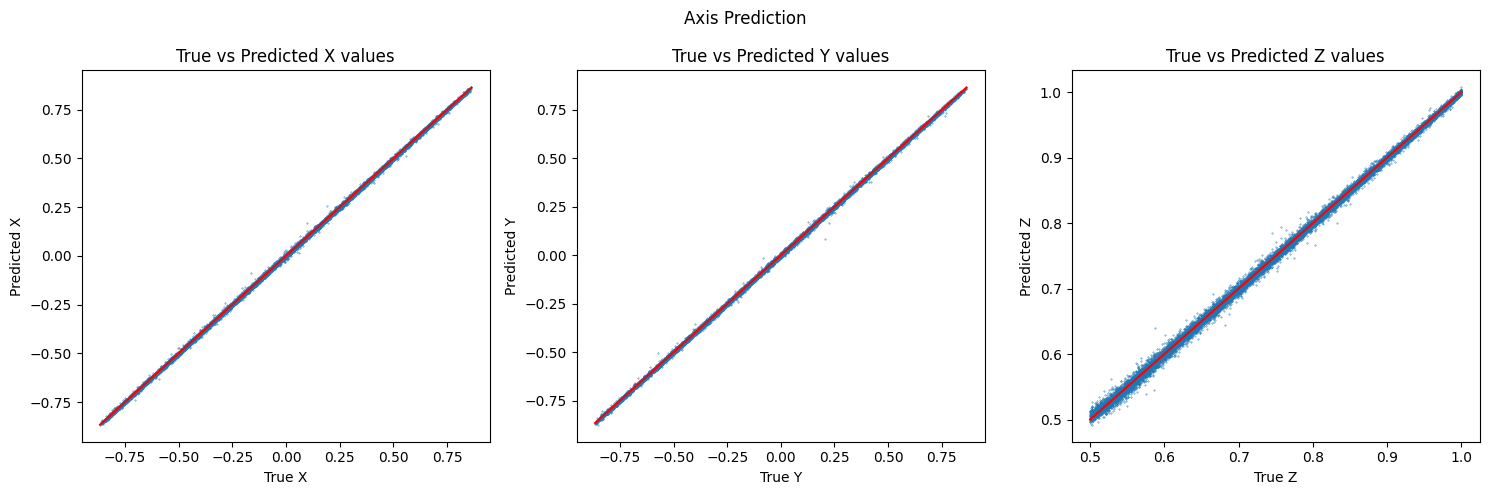

In [39]:
fig, ax =plt.subplots(1,3,figsize=(15,5))
ax[0].scatter(A_test[:,0],A[:,0],s=0.1)
ax[0].plot([min(A_test[:,0]), max(A_test[:,0])], [min(A_test[:,0]), max(A_test[:,0])], color='red')  # ideal line
ax[0].set_xlabel('True X')
ax[0].set_ylabel('Predicted X')
ax[0].set_title('True vs Predicted X values')

ax[1].scatter(A_test[:,1],A[:,1],s=0.1)
ax[1].plot([min(A_test[:,1]), max(A_test[:,1])], [min(A_test[:,1]), max(A_test[:,1])], color='red')  # ideal line
ax[1].set_xlabel('True Y')
ax[1].set_ylabel('Predicted Y')
ax[1].set_title('True vs Predicted Y values')

ax[2].scatter(A_test[:,2],A[:,2],s=0.1)
ax[2].plot([min(A_test[:,2]), max(A_test[:,2])], [min(A_test[:,2]), max(A_test[:,2])], color='red')  # ideal line
ax[2].set_xlabel('True Z')
ax[2].set_ylabel('Predicted Z')
ax[2].set_title('True vs Predicted Z values')

plt.suptitle('Axis Prediction')
plt.tight_layout()
plt.show()


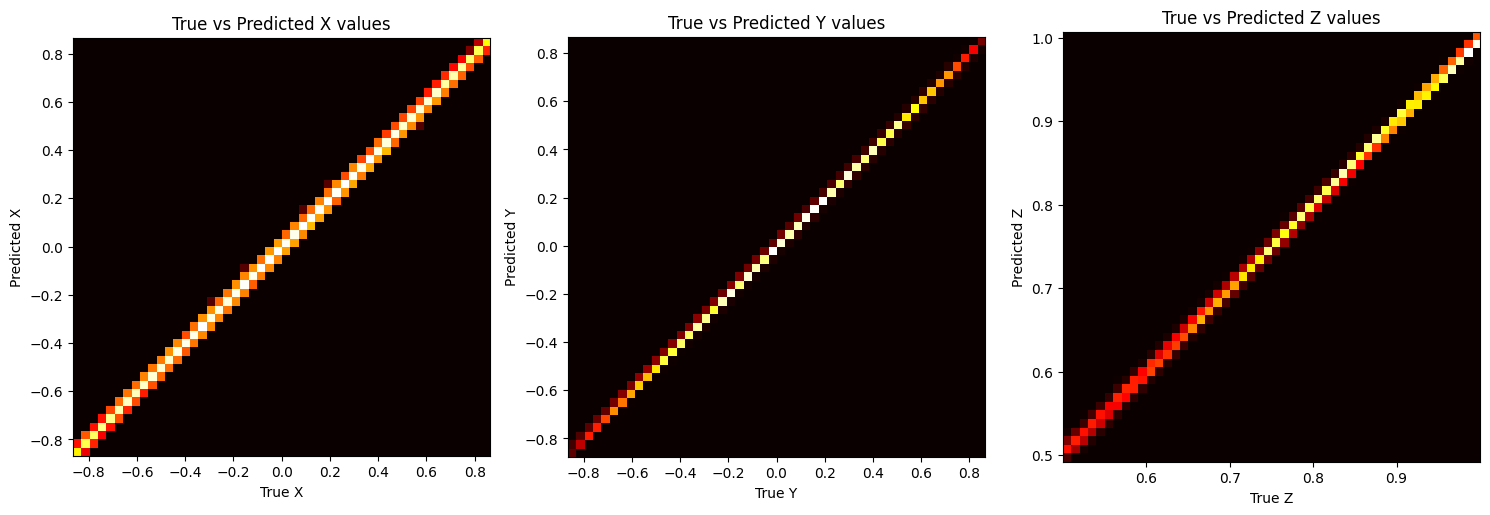

In [40]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

heatmap0, xedges0, yedges0 = np.histogram2d(A_test[:,0], A[:,0], bins=50)
extent0 = [xedges0[0], xedges0[-1], yedges0[0], yedges0[-1]]

heatmap0 = np.log10(heatmap0+1)
heatmap1, xedges1, yedges1 = np.histogram2d(A_test[:,1], A[:,1], bins=50)
extent1 = [xedges1[0], xedges1[-1], yedges1[0], yedges1[-1]]

heatmap2, xedges2, yedges2 = np.histogram2d(A_test[:,2], A[:,2], bins=50)
extent2 = [xedges2[0], xedges2[-1], yedges2[0], yedges2[-1]]

ax[0].imshow(heatmap0.T, extent=extent0, origin='lower', cmap='hot')
ax[0].set_xlabel('True X')
ax[0].set_ylabel('Predicted X')
ax[0].set_title('True vs Predicted X values')

ax[1].imshow(heatmap1.T, extent=extent1, origin='lower', cmap='hot')
ax[1].set_xlabel('True Y')
ax[1].set_ylabel('Predicted Y')
ax[1].set_title('True vs Predicted Y values')

ax[2].imshow(heatmap2.T, extent=extent2, origin='lower', cmap='hot')
ax[2].set_xlabel('True Z')
ax[2].set_ylabel('Predicted Z')
ax[2].set_title('True vs Predicted Z values')

plt.tight_layout()
plt.show()


In [41]:
def angle_between_vectors(v1, v2):
    dot_product = np.sum(v1*v2, axis=1)
    magnitude_v1 = np.linalg.norm(v1, axis=1)
    magnitude_v2 = np.linalg.norm(v2, axis=1)
    cos_theta = dot_product / (magnitude_v1 * magnitude_v2)
    theta = np.arccos(np.clip(cos_theta, -1, 1)) # to avoid floating-point errors
    theta = np.degrees(theta)
    return theta

In [42]:
E_res = np.abs(10**(E[:,0]-E_test[:])-1)
C_res = np.linalg.norm(C -C_test,axis =1)
A_norm = np.sqrt(A[:,0]**2 + A[:,1]**2 + A[:,2]**2)
A_res = angle_between_vectors(A,A_test)

E_res = E_res[np.where(E_res<np.percentile(E_res,99))]
C_res = C_res[np.where(C_res<np.percentile(C_res,99))]
A_res = A_res[np.where(A_res<np.percentile(A_res,99))]


print(E_res.shape)
print(C_res.shape)
print(A_res.shape)

(19800,)
(19800,)
(19800,)


Text(0.95, 0.95, '$\\sigma_{68} = 0.47^\\circ$')

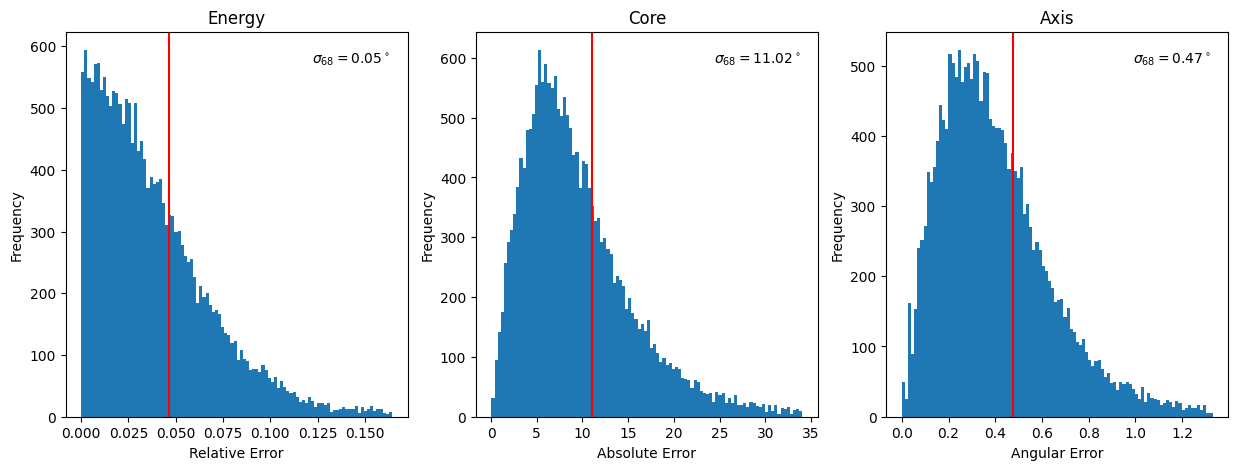

In [43]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

reso = np.percentile(E_res,68)
ax[0].hist(E_res,bins=100)
ax[0].set_xlabel('Relative Error')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Energy')
# ax[0].set_yscale('log')
ax[0].axvline(reso,color='red',label='68%')
ax[0].text(0.95, 0.95, '$\sigma_{68} = %.2f^\circ$' % reso, ha='right', va='top', transform=ax[0].transAxes)


reso = np.percentile(C_res,68)
ax[1].hist(C_res,bins=100)
ax[1].set_xlabel('Absolute Error')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Core')
# ax[1].set_yscale('log')
ax[1].axvline(reso,color='red',label='68%')
ax[1].text(0.95, 0.95, '$\sigma_{68} = %.2f^\circ$' % reso, ha='right', va='top', transform=ax[1].transAxes)

reso = np.percentile(A_res,68)
ax[2].hist(A_res,bins=100)
ax[2].set_xlabel('Angular Error')
ax[2].set_ylabel('Frequency')
ax[2].set_title('Axis')
# ax[2].set_yscale('log')
ax[2].axvline(np.percentile(A_res,68),color='red',label='68%')
ax[2].text(0.95, 0.95, '$\sigma_{68} = %.2f^\circ$' % reso, ha='right', va='top', transform=ax[2].transAxes)


In [44]:
print(model.Name)

Model_2_2
